# Regressão 01 - tarefa 01

### 1. Explorando a base de gorjetas

a. Na aula fizemos uma regressão de ```tip``` explicada por ```net_bill```. Carregue os pacotes e a base, crie as variáveis necessárias como na aula, e reproduza esta regressão.

b. Reproduza também o gráfico de dispersão dessas duas variáveis.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.formula.api as smf

from seaborn import load_dataset

In [2]:
# Carregar o dataset tips
tips = sns.load_dataset('tips')

# Visualizar os primeiros registros
print(tips.head())

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


In [3]:
# Criar o modelo de regressão
model = smf.ols(formula='tip ~ total_bill', data=tips).fit()

# Exibir o resumo dos resultados
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.457
Model:                            OLS   Adj. R-squared:                  0.454
Method:                 Least Squares   F-statistic:                     203.4
Date:                Thu, 08 Aug 2024   Prob (F-statistic):           6.69e-34
Time:                        15:14:39   Log-Likelihood:                -350.54
No. Observations:                 244   AIC:                             705.1
Df Residuals:                     242   BIC:                             712.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.9203      0.160      5.761      0.0

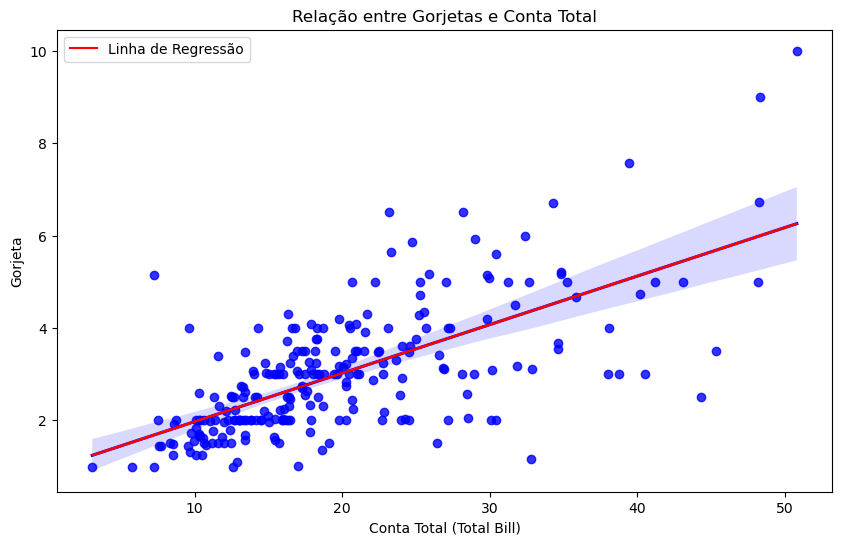

In [7]:
# Criar um gráfico de dispersão
plt.figure(figsize=(10, 6))
sns.regplot(data=tips, x='total_bill', y='tip', color='blue')

# Adicionar a linha de regressão
plt.plot(tips['total_bill'], model.predict(), color='red', label='Linha de Regressão')

# Adicionar títulos e legendas
plt.title('Relação entre Gorjetas e Conta Total')
plt.xlabel('Conta Total (Total Bill)')
plt.ylabel('Gorjeta')
plt.legend()
plt.show()

### 2. Mudança de perspectiva

Agora ajuste um modelo de regressão de ```tip_pct``` por ```net_bill```. Construa o gráfico de dispersão correspondente.

In [8]:
# Calcular a porcentagem da gorjeta em relação à conta total
tips['tip_pct'] = (tips['tip'] / tips['total_bill']) * 100

# Visualizar os primeiros registros com a nova coluna
print(tips.head())

   total_bill   tip     sex smoker  day    time  size    tip_pct
0       16.99  1.01  Female     No  Sun  Dinner     2   5.944673
1       10.34  1.66    Male     No  Sun  Dinner     3  16.054159
2       21.01  3.50    Male     No  Sun  Dinner     3  16.658734
3       23.68  3.31    Male     No  Sun  Dinner     2  13.978041
4       24.59  3.61  Female     No  Sun  Dinner     4  14.680765


In [9]:
# Criar o modelo de regressão
model = smf.ols(formula='tip_pct ~ total_bill', data=tips).fit()

# Exibir o resumo dos resultados
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                tip_pct   R-squared:                       0.115
Model:                            OLS   Adj. R-squared:                  0.111
Method:                 Least Squares   F-statistic:                     31.34
Date:                Thu, 08 Aug 2024   Prob (F-statistic):           5.85e-08
Time:                        15:28:22   Log-Likelihood:                -772.37
No. Observations:                 244   AIC:                             1549.
Df Residuals:                     242   BIC:                             1556.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     20.6766      0.900     22.975      0.0

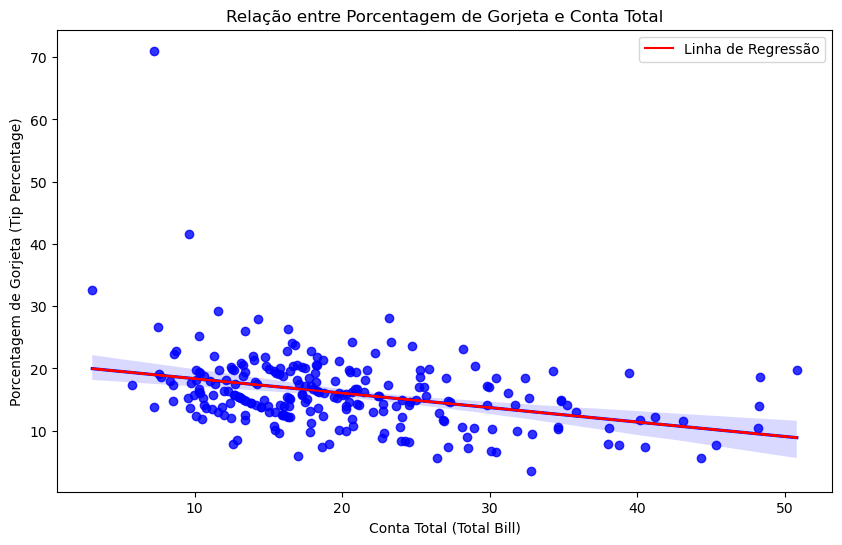

In [11]:
# Criar um gráfico de dispersão
plt.figure(figsize=(10, 6))
sns.regplot(data=tips, x='total_bill', y='tip_pct', color='blue')

# Adicionar a linha de regressão
plt.plot(tips['total_bill'], model.predict(), color='red', label='Linha de Regressão')

# Adicionar títulos e legendas
plt.title('Relação entre Porcentagem de Gorjeta e Conta Total')
plt.xlabel('Conta Total (Total Bill)')
plt.ylabel('Porcentagem de Gorjeta (Tip Percentage)')
plt.legend()
plt.show()

### 3. Comente

Compare os dois gráficos e comente (de forma objetiva e suscinta) a relação entre eles e a diferença do ajuste. Podemos comparar diretamente os $R^2$s?

In [ ]:
O primeiro gráfico esta em crescimento e o segunda esta em declinio e o R²s não explica nenhuma variabilidade dos dados.

### 4. Ajuste do modelo em outra escala

Com o modelo no item 3, obtenha a preditiva do valor da gorjeta:
  1. obtenha o valor predito ```pred``` para ```tip_pct``` (dica, veja o atributo ```reg.fittedvalues```)
  2. obtenha o valor predito para ```tip``` como ```tip_pct * net_bill```
  3. calcule o $R^2$ do modelo para ```tip```
  4. compare esse $R^2$ com o do item 1

In [12]:
# Obter os valores preditos
pred = model.fittedvalues

# Adicionar os valores preditos ao DataFrame
tips['pred_tip_pct'] = pred

# Visualizar as primeiras linhas do DataFrame com os valores preditos
print(tips[['total_bill', 'tip_pct', 'pred_tip_pct']].head())

   total_bill    tip_pct  pred_tip_pct
0       16.99   5.944673     16.729762
1       10.34  16.054159     18.274574
2       21.01  16.658734     15.795907
3       23.68  13.978041     15.175659
4       24.59  14.680765     14.964264


In [13]:
# Obter os valores preditos
pred_tip_pct = model.fittedvalues

# Adicionar os valores preditos ao DataFrame
tips['pred_tip_pct'] = pred_tip_pct

In [14]:
# Calcular o valor predito para tip
tips['pred_tip'] = (tips['pred_tip_pct'] / 100) * tips['total_bill']

# Visualizar as primeiras linhas do DataFrame com os valores preditos
print(tips[['total_bill', 'tip_pct', 'pred_tip_pct', 'pred_tip']].head())

   total_bill    tip_pct  pred_tip_pct  pred_tip
0       16.99   5.944673     16.729762  2.842387
1       10.34  16.054159     18.274574  1.889591
2       21.01  16.658734     15.795907  3.318720
3       23.68  13.978041     15.175659  3.593596
4       24.59  14.680765     14.964264  3.679713


In [15]:
# Ajustar o modelo de regressão para a variável tip
model_tip = smf.ols(formula='tip ~ total_bill', data=tips).fit()

# Calcular o R²
r_squared_tip = model_tip.rsquared

# Exibir o valor de R²
print(f'R² para o modelo de tip: {r_squared_tip}')

R² para o modelo de tip: 0.45661658635167646


In [ ]:
Ambos R²s são parecidos porém não explica nenhuma variabilidade dos dados.